## Table of Contents
1. Import
2. Graph visualization - Networkx
3. Graph visualization - Pyvis
4. Community detection - Leiden algorithm


## 1. Import

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
# Import relationship data

relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [4]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,21
2,Germany,Italy,26
3,Austria,Germany,11
4,Germany,Spain,2
...,...,...,...
79,Germany,Norway,6
80,Greece,Italy,3
81,Italy,Japan,6
82,Romania,Russia,6


In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## 2. Graph visualization - Networkx

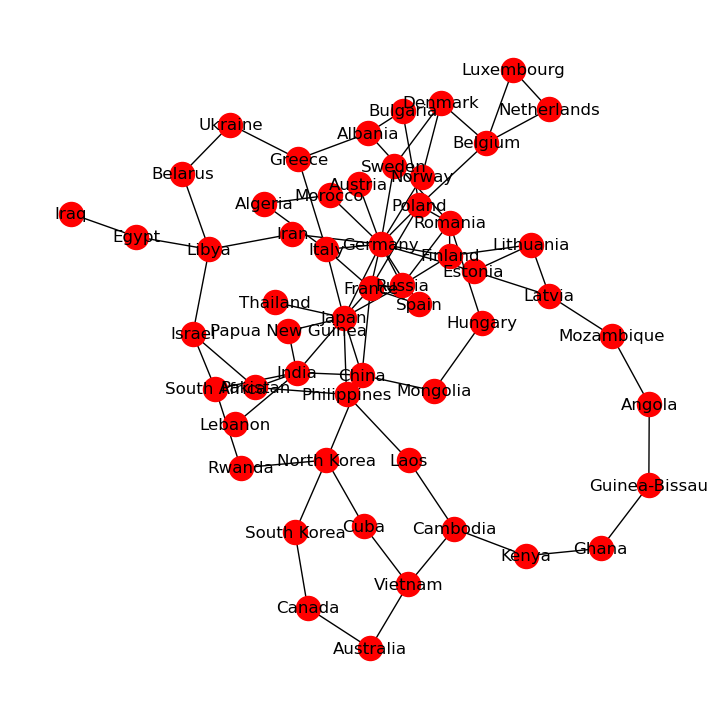

In [6]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [8]:
h.savefig('networkx_plt_20th_century.png')

## 3. Graph visualization - Pyvis

In [9]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

20th_century.html


## 4. Community detection - Leiden algorithm

In [13]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [14]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [15]:
new_com = coms.to_node_community_map()

In [16]:
new_com

defaultdict(list,
            {'Japan': [0],
             'China': [0],
             'Thailand': [0],
             'Philippines': [0],
             'India': [0],
             'Pakistan': [0],
             'Israel': [0],
             'South Africa': [0],
             'Papua New Guinea': [0],
             'Hungary': [0],
             'Mongolia': [0],
             'Lebanon': [0],
             'France': [1],
             'Russia': [1],
             'Germany': [1],
             'Italy': [1],
             'Austria': [1],
             'Spain': [1],
             'Poland': [1],
             'Finland': [1],
             'Morocco': [1],
             'Algeria': [1],
             'Romania': [1],
             'Estonia': [2],
             'Latvia': [2],
             'Lithuania': [2],
             'Laos': [2],
             'Cambodia': [2],
             'Kenya': [2],
             'Ghana': [2],
             'Guinea-Bissau': [2],
             'Angola': [2],
             'Mozambique': [2],
             'A

In [17]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [18]:
dict_com

{'Japan': 0,
 'China': 0,
 'Thailand': 0,
 'Philippines': 0,
 'India': 0,
 'Pakistan': 0,
 'Israel': 0,
 'South Africa': 0,
 'Papua New Guinea': 0,
 'Hungary': 0,
 'Mongolia': 0,
 'Lebanon': 0,
 'France': 1,
 'Russia': 1,
 'Germany': 1,
 'Italy': 1,
 'Austria': 1,
 'Spain': 1,
 'Poland': 1,
 'Finland': 1,
 'Morocco': 1,
 'Algeria': 1,
 'Romania': 1,
 'Estonia': 2,
 'Latvia': 2,
 'Lithuania': 2,
 'Laos': 2,
 'Cambodia': 2,
 'Kenya': 2,
 'Ghana': 2,
 'Guinea-Bissau': 2,
 'Angola': 2,
 'Mozambique': 2,
 'Albania': 3,
 'Greece': 3,
 'Ukraine': 3,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Iran': 3,
 'Bulgaria': 3,
 'North Korea': 4,
 'Cuba': 4,
 'South Korea': 4,
 'Canada': 4,
 'Australia': 4,
 'Vietnam': 4,
 'Rwanda': 4,
 'Belgium': 5,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5}

In [19]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_cent_communities_leiden.html")

20th_cent_communities_leiden.html


The community detection algorithm groups countries based on broad historical, political, and regional connections. Cluster 0 includes many Asian and African nations, possibly linked by geography or economic ties. Cluster 1 consists mostly of European countries, which have shared political and historical relationships. Cluster 2 brings together Baltic, Southeast Asian, and African nations, suggesting common influences. Cluster 3 features Eastern European and Middle Eastern countries, which have interacted through various historical events. Cluster 4 includes Cold War-era powers and Pacific nations. Cluster 5 consists of Northern European countries, known for their regional similarities.

## 5. The most important countries in 20th Century wiki page

In [20]:
# Dregree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.12962962962962962,
 'Russia': 0.09259259259259259,
 'Germany': 0.24074074074074073,
 'Italy': 0.09259259259259259,
 'Austria': 0.018518518518518517,
 'Spain': 0.037037037037037035,
 'Poland': 0.09259259259259259,
 'Estonia': 0.05555555555555555,
 'Latvia': 0.05555555555555555,
 'Lithuania': 0.05555555555555555,
 'Finland': 0.07407407407407407,
 'Belgium': 0.07407407407407407,
 'Netherlands': 0.037037037037037035,
 'Luxembourg': 0.037037037037037035,
 'Denmark': 0.05555555555555555,
 'Norway': 0.037037037037037035,
 'Sweden': 0.037037037037037035,
 'Albania': 0.05555555555555555,
 'Greece': 0.05555555555555555,
 'Ukraine': 0.037037037037037035,
 'Belarus': 0.037037037037037035,
 'Libya': 0.07407407407407407,
 'Egypt': 0.037037037037037035,
 'Iraq': 0.018518518518518517,
 'Japan': 0.16666666666666666,
 'Morocco': 0.037037037037037035,
 'Algeria': 0.037037037037037035,
 'China': 0.09259259259259259,
 'Thailand': 0.018518518518518517,
 'Philippines': 0.05555555555555555,
 'Ind

In [21]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [22]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

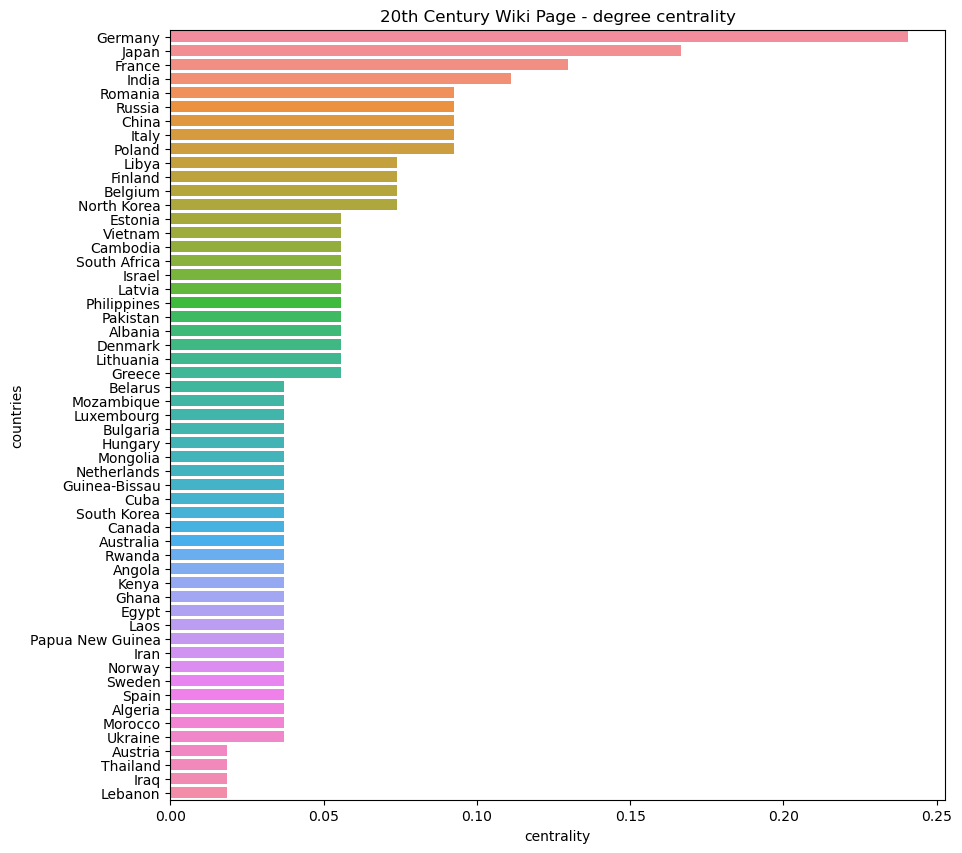

In [24]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Wiki Page - degree centrality")

Countries with higher degree centrality, like Germany, Japan, and France, are more connected in the global network, suggesting they play key roles in trade, politics, and diplomacy. Moderate centrality countries, such as India and China, are well-connected but not as dominant. Nations with lower degree centrality, like Iraq and Lebanon, are less connected, indicating more isolated or specialized roles. Overall, this measure highlights the global influence and centrality of countries based on their direct connections, without accounting for their intermediary or accessibility roles in the network.

In [25]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [33]:
closeness_dict

{'France': 0.3576158940397351,
 'Russia': 0.32727272727272727,
 'Germany': 0.38028169014084506,
 'Italy': 0.32926829268292684,
 'Austria': 0.27692307692307694,
 'Spain': 0.2918918918918919,
 'Poland': 0.3176470588235294,
 'Estonia': 0.29508196721311475,
 'Latvia': 0.24434389140271492,
 'Lithuania': 0.24545454545454545,
 'Finland': 0.3,
 'Belgium': 0.25116279069767444,
 'Netherlands': 0.20224719101123595,
 'Luxembourg': 0.20224719101123595,
 'Denmark': 0.23478260869565218,
 'Norway': 0.28421052631578947,
 'Sweden': 0.28421052631578947,
 'Albania': 0.23788546255506607,
 'Greece': 0.26865671641791045,
 'Ukraine': 0.225,
 'Belarus': 0.22040816326530613,
 'Libya': 0.2660098522167488,
 'Egypt': 0.2125984251968504,
 'Iraq': 0.1758957654723127,
 'Japan': 0.3724137931034483,
 'Morocco': 0.27979274611398963,
 'Algeria': 0.25116279069767444,
 'China': 0.32142857142857145,
 'Thailand': 0.2727272727272727,
 'Philippines': 0.3068181818181818,
 'India': 0.3103448275862069,
 'Pakistan': 0.268656716417

In [26]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

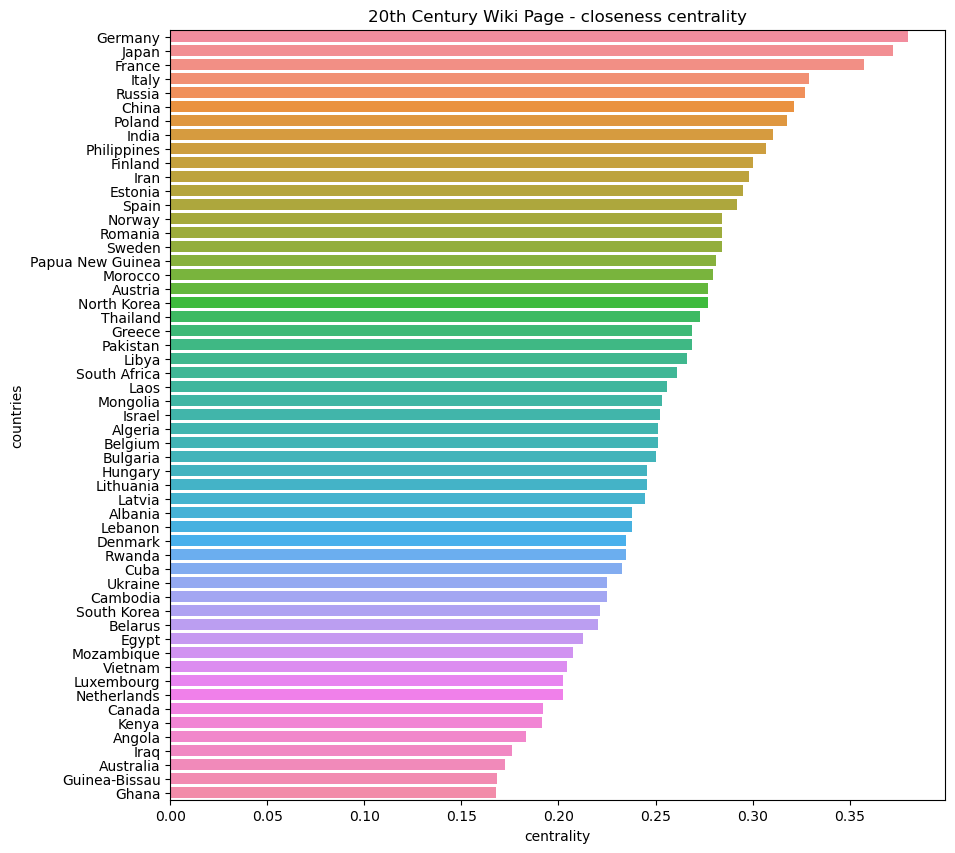

In [28]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th Century Wiki Page - closeness centrality")

The closeness centrality values represent how efficiently each country can reach all others in the network. Germany, Japan, and France have the highest values, indicating they are well-positioned to connect quickly with other countries. China, India, and Russia also have moderate centrality, suggesting they are relatively close to other countries but not as dominant. Countries like Kenya, Ghana, and Australia have lower values, meaning they are more distant in terms of shortest paths. This suggests these countries are less centrally positioned in the network compared to others, affecting their influence or connectivity.

In [29]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [34]:
betweenness_dict

{'France': 0.1287189555533371,
 'Russia': 0.03886379266358302,
 'Germany': 0.40828147704457984,
 'Italy': 0.08863196454915533,
 'Austria': 0.0,
 'Spain': 0.0,
 'Poland': 0.14623806196133238,
 'Estonia': 0.11240391334730956,
 'Latvia': 0.09047286279990682,
 'Lithuania': 0.015688329839273235,
 'Finland': 0.03910907013632382,
 'Belgium': 0.07765132607899901,
 'Netherlands': 0.0,
 'Luxembourg': 0.0,
 'Denmark': 0.004542278127183787,
 'Norway': 0.014633456457355826,
 'Sweden': 0.014633456457355826,
 'Albania': 0.013391678590840015,
 'Greece': 0.04873922664803166,
 'Ukraine': 0.012237529533127015,
 'Belarus': 0.011180992313067784,
 'Libya': 0.12233037170144087,
 'Egypt': 0.037037037037037035,
 'Iraq': 0.0,
 'Japan': 0.2915113751067628,
 'Morocco': 0.007628697880270208,
 'Algeria': 0.0011646866992778941,
 'China': 0.18929236963828155,
 'Thailand': 0.0,
 'Philippines': 0.12699327809390698,
 'India': 0.09572116291193858,
 'Pakistan': 0.03745133273435159,
 'Israel': 0.05533592892083457,
 'South 

In [30]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

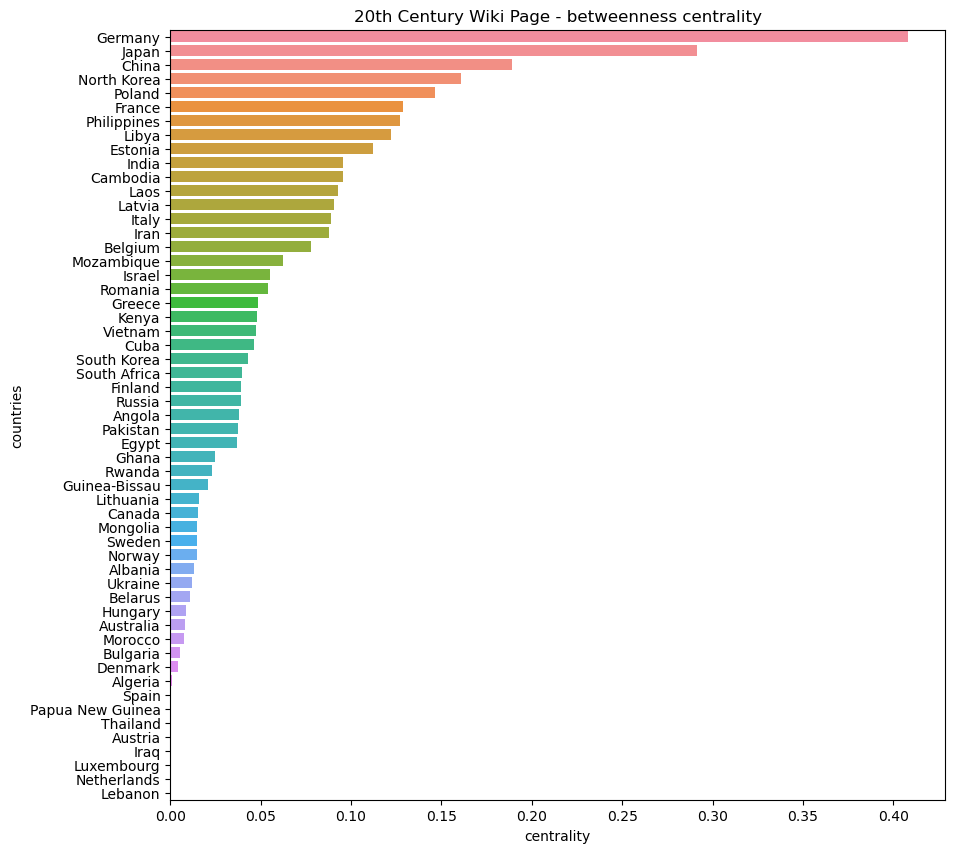

In [31]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century Wiki Page - betweenness centrality")

The betweenness centrality values measure the extent to which a country acts as a bridge along the shortest paths between other countries in the network. Germany, Japan, and France have the highest betweenness centrality, suggesting they play a key role in connecting different regions of the network. China and North Korea also have significant betweenness centrality, positioning them as important intermediaries. Countries with zero or low values like Austria, Spain, Belgium, and Lebanon are less involved in connecting other countries, making them less central in terms of intermediation.

In [32]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')